# **TIME SERIES ANALYSIS 📈 ARIMA, PROPHET, ADF, PACF**

# **BUSINESS PROBLEM**

Features:

    - Date: TimeSeries
    - Rainfall_Bastia_Umbra: indicates the quantity of rain falling Bastia Umbra (mm)
    - Temperature_Bastia_Umbra: indicates the temperature Bastia Umbra (°C)
    - Temperature_Petrignano: indicates the temperature Petrignano (°C)
    - Volume indicates the volume of water taken from the drinking water treatment plant (m 3 )
    - Hydrometry indicates the groundwater level (m)

Target:

    - Depth_to_Groundwater_P24: indicates the groundwater level (m from the ground floor)
    - Depth_to_Groundwater_P25: indicates the groundwater level (m from the ground floor)

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.simplefilter('ignore')

In [2]:
path = './dataset/Aquifer_Petrignano.csv'
df = pd.read_csv(path)
line = '='*30

In [3]:
def data_statistics(data):
    print('NUMERIC FEATURES')
    display(data.describe([0.05,0.25,0.75,0.95]).T)
    if('object' in data.dtypes.to_list()):
        print('CATEGORICAL FEATURES')
        display(data.describe(include='object').T)

def data_profile(data):
    count_of_duplicate = len(data[data.duplicated()])
    data_size = round(data.memory_usage(deep=True).sum()/1000000, 2)
    data_dimension = data.shape
    dtype = data.dtypes
    count_of_null = data.isna().sum()
    null_ratio = round(count_of_null/len(data), 2)
    count_of_distinct = data.nunique()
    distinct_value = data.apply(lambda x: x.unique())
    output = pd.DataFrame(list(zip(dtype, count_of_null, null_ratio, count_of_distinct, distinct_value)),
                          index=data.columns,
                          columns=['dtype','count_of_null','null_ratio','count_of_distinct','distinct_value'])
    print(f'Dimensions\t: {data_dimension}')
    print(f'Data Size\t: {data_size} MB')
    if count_of_duplicate == 0:
        print(f'Duplicated Data\t: {count_of_duplicate}')
    else:
        print(line)
        print(f'Duplicated Data\t: {count_of_duplicate}')
        display(data[data.duplicated()])
    print(line)
    print('SUMMARY')
    display(output)

In [4]:
data_profile(df)
data_statistics(df)
display(df.head())

Dimensions	: (5223, 8)
Data Size	: 0.64 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Date,object,0,0.00,5223,"[14/03/2006, 15/03/2006, 16/03/2006, 17/03/200..."
Rainfall_Bastia_Umbra,float64,1024,0.20,223,"[nan, 0.0, 0.9, 1.1, 0.1, 4.1, 2.9, 7.0, 0.4, ..."
Depth_to_Groundwater_P24,float64,55,0.01,1306,"[-22.48, -22.38, -22.25, -22.6, -22.35, -22.5,..."
Depth_to_Groundwater_P25,float64,39,0.01,1298,"[-22.18, -22.14, -22.04, -21.95, -21.99, -21.8..."
Temperature_Bastia_Umbra,float64,1024,0.20,336,"[nan, 5.2, 2.3, 4.4, 0.8, -1.9, -0.7, 1.5, 4.3..."
Temperature_Petrignano,float64,1024,0.20,320,"[nan, 4.9, 2.5, 3.9, 0.8, -2.1, -0.7, -0.3, 6...."
Volume_C10_Petrignano,float64,198,0.04,4324,"[nan, -29281.824, -29245.536, -29355.264, -301..."
Hydrometry_Fiume_Chiascio_Petrignano,float64,1024,0.20,25,"[nan, 2.4, 2.5, 2.3, 2.6, 2.7, 2.8, 2.9, 2.2, ..."


NUMERIC FEATURES


,count,mean,std,min,5%,25%,50%,75%,95%,max
Rainfall_Bastia_Umbra,4199.0,1.556633,5.217923,0.000,0.0000,0.00,0.00,0.10,10.400,67.30
Depth_to_Groundwater_P24,5168.0,-26.263723,3.319858,-34.470,-32.7765,-28.25,-25.99,-23.82,-21.170,-19.66
Depth_to_Groundwater_P25,5184.0,-25.692926,3.214165,-33.710,-31.8600,-27.62,-25.54,-23.43,-20.660,-19.10
Temperature_Bastia_Umbra,4199.0,15.030293,7.794871,-3.700,2.8000,8.80,14.70,21.40,27.600,33.00
Temperature_Petrignano,4199.0,13.739081,7.701369,-4.200,0.9000,7.70,13.50,20.00,26.200,31.10
Volume_C10_Petrignano,5025.0,-29043.296726,4751.864371,-45544.896,-36826.2720,-31678.56,-28689.12,-26218.08,-22976.352,0.00
Hydrometry_Fiume_Chiascio_Petrignano,4199.0,2.372517,0.589088,0.000,1.9000,2.10,2.40,2.70,3.100,4.10


CATEGORICAL FEATURES


,count,unique,top,freq
Date,5223,5223,14/03/2006,1


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


# **DATA CLEANSING**

In [5]:
# remove rows in column Rainfall_Bastia_Umbra is null
df_clean = df.copy()
# df_clean = df.dropna(subset='Rainfall_Bastia_Umbra').reset_index(drop=True)   # same value
df_clean = df[df.Rainfall_Bastia_Umbra.notnull()].reset_index(drop=True)        # same value

# remove not usefull columns
df_clean.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1, inplace=True)

# simplify columns names
columns = ['Date','Rainfall','Depth','Temperature','DrainageVolume','Hydrometry']
target = ['Depth']
features = [i for i in columns if i not in target]
df_clean.columns = columns

In [6]:
data_profile(df_clean)
df_clean

Dimensions	: (4199, 6)
Data Size	: 0.45 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Date,object,0,0.00,4199,"[01/01/2009, 02/01/2009, 03/01/2009, 04/01/200..."
Rainfall,float64,0,0.00,223,"[0.0, 0.9, 1.1, 0.1, 4.1, 2.9, 7.0, 0.4, 2.8, ..."
Depth,float64,27,0.01,1142,"[-31.14, -31.11, -31.07, -31.05, -31.01, -31.0..."
Temperature,float64,0,0.00,336,"[5.2, 2.3, 4.4, 0.8, -1.9, -0.7, 1.5, 4.3, 4.9..."
DrainageVolume,float64,1,0.00,3669,"[-24530.688, -28785.888, -25766.208, -27919.29..."
Hydrometry,float64,0,0.00,25,"[2.4, 2.5, 2.3, 2.6, 2.7, 2.8, 2.9, 2.2, 2.1, ..."


,Date,Rainfall,Depth,Temperature,DrainageVolume,Hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...,...
4194,26/06/2020,0.0,-25.07,25.7,-29930.688,2.5
4195,27/06/2020,0.0,-25.11,26.2,-31332.960,2.4
4196,28/06/2020,0.0,-25.19,26.9,-32120.928,2.4
4197,29/06/2020,0.0,-25.18,26.9,-30602.880,2.4


## **Check Chronological Order and Equidistant Timestamps**
The data should be in chronological order and the timestamps should be equidistant in time series. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.


In [7]:
# from datetime import datetime

df_clean1 = df_clean.copy()
#convert date typedata to date
df_clean1['Date'] = pd.to_datetime(df_clean1.Date, format='%d/%m/%Y')
df_clean1 = df_clean1.sort_values('Date').reset_index(drop=True)

df_clean1['DeltaDiff'] = df_clean1.Date - df_clean1.Date.shift(1) 

print(df_clean1.DeltaDiff.sum(), df_clean1.DeltaDiff.count()) # Check Constant interval
display(df_clean1)
df_clean1.drop(['DeltaDiff'], axis=1, inplace=True)
data_profile(df_clean1)

4198 days 00:00:00 4198


,Date,Rainfall,Depth,Temperature,DrainageVolume,Hydrometry,DeltaDiff
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4,NaT
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5,1 days
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4,1 days
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4,1 days
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3,1 days
...,...,...,...,...,...,...,...
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5,1 days
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4,1 days
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4,1 days
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4,1 days


Dimensions	: (4199, 6)
Data Size	: 0.2 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Date,datetime64[ns],0,0.00,4199,"[2009-01-01T00:00:00.000000000, 2009-01-02T00:..."
Rainfall,float64,0,0.00,223,"[0.0, 0.9, 1.1, 0.1, 4.1, 2.9, 7.0, 0.4, 2.8, ..."
Depth,float64,27,0.01,1142,"[-31.14, -31.11, -31.07, -31.05, -31.01, -31.0..."
Temperature,float64,0,0.00,336,"[5.2, 2.3, 4.4, 0.8, -1.9, -0.7, 1.5, 4.3, 4.9..."
DrainageVolume,float64,1,0.00,3669,"[-24530.688, -28785.888, -25766.208, -27919.29..."
Hydrometry,float64,0,0.00,25,"[2.4, 2.5, 2.3, 2.6, 2.7, 2.8, 2.9, 2.2, 2.1, ..."


## **Handle Missing Values**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date

sns.set_context('notebook')
sns.set_palette('cool')
sns.set(rc={
    'figure.figsize':(16,5)
})

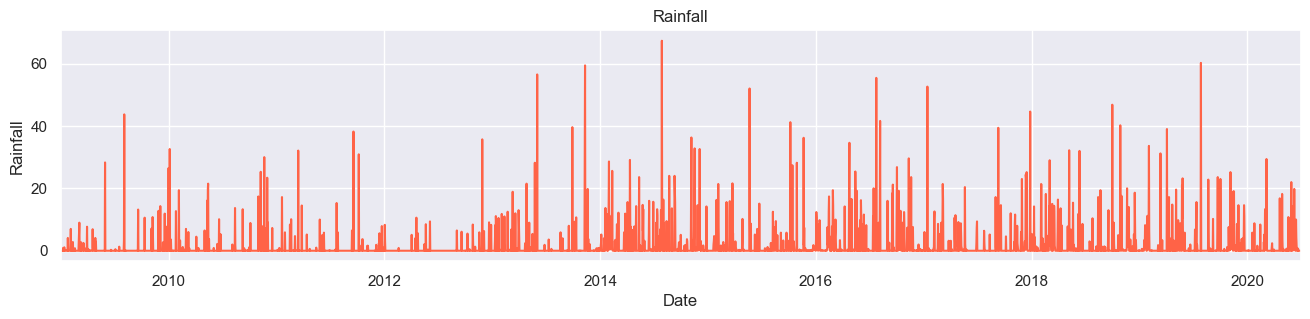

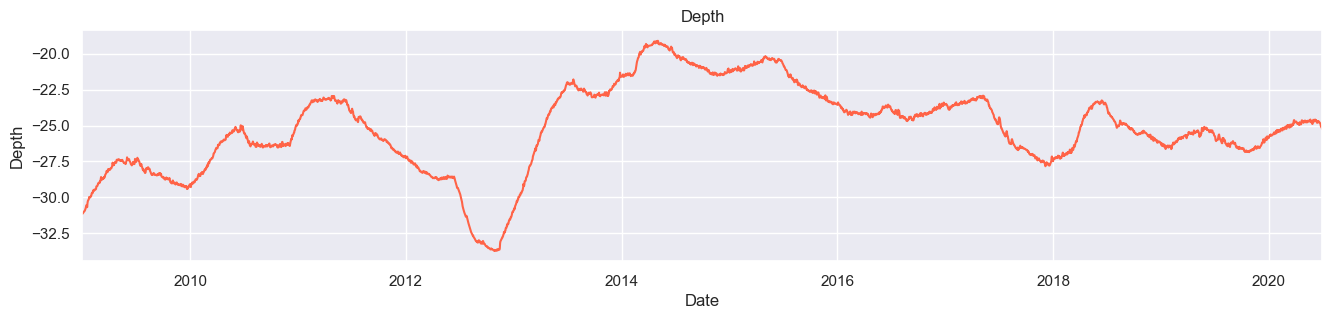

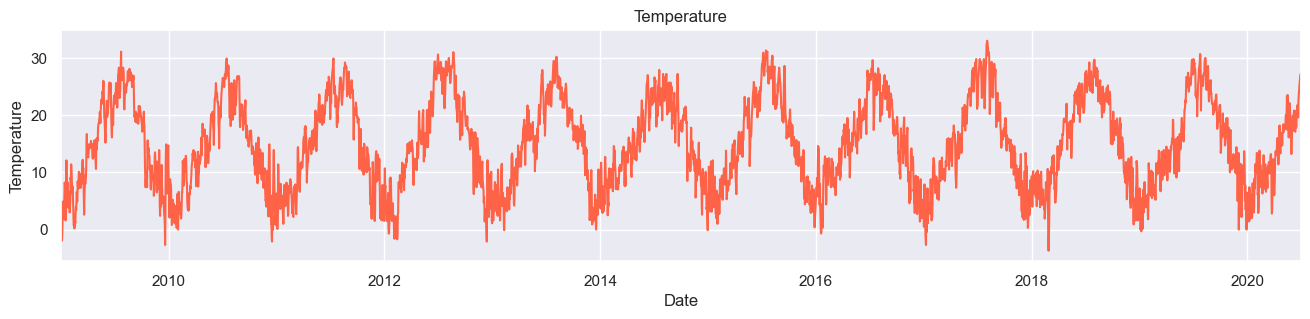

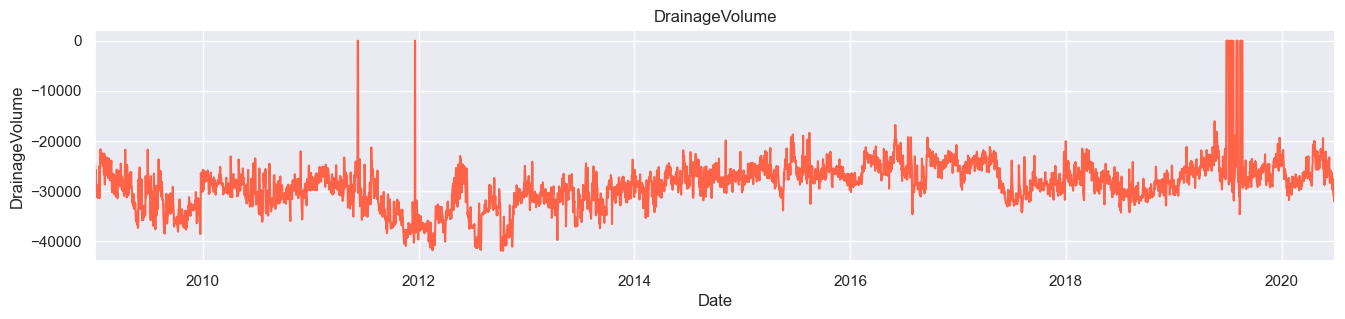

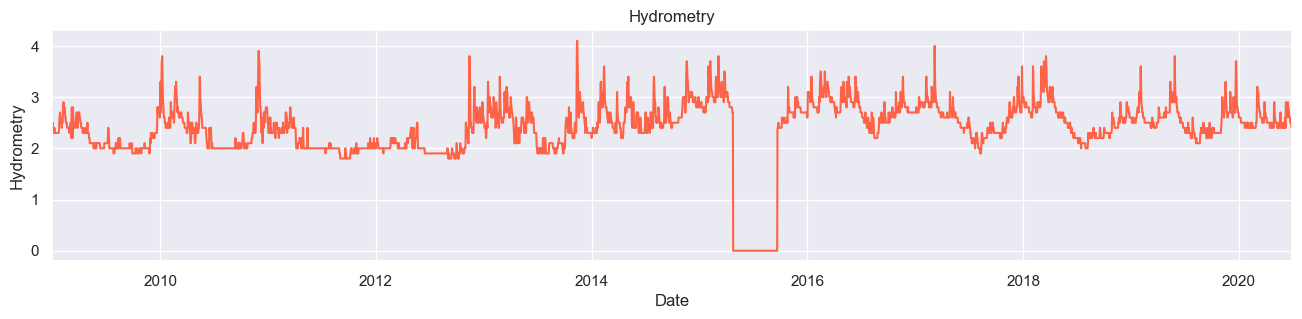

In [9]:
for index, feature in enumerate([i for i in df_clean1.columns if i not in ['Date']]):
    f, ax = plt.subplots(figsize=(16,3))
    sns.lineplot(x=df_clean1.Date, y=df_clean1[feature], color='tomato').set(
        title=feature,
        xlim=[df_clean1.Date.min(), df_clean1.Date.max()])


As we can see, the dataset has some null values DrainageVolume, and Depth. For zero values in DrainageVolume, and Hydrometry is disgusting. So we have to fix missing values and zero values in DrainageVolume and Hydrometry. Lets take a look of these cases and explore what can we do with them.

Handle Missing Values for Time Series:

    - bfill or ffill
    - interpolation

[(16314.0, 16953.0)]

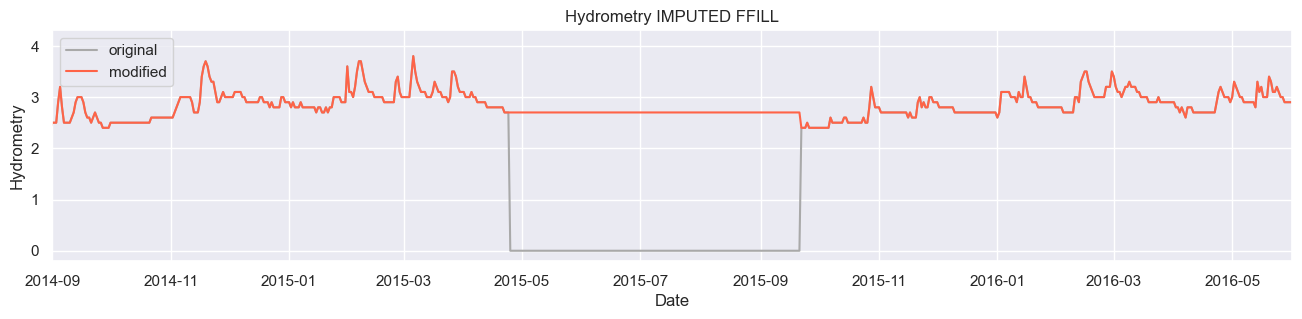

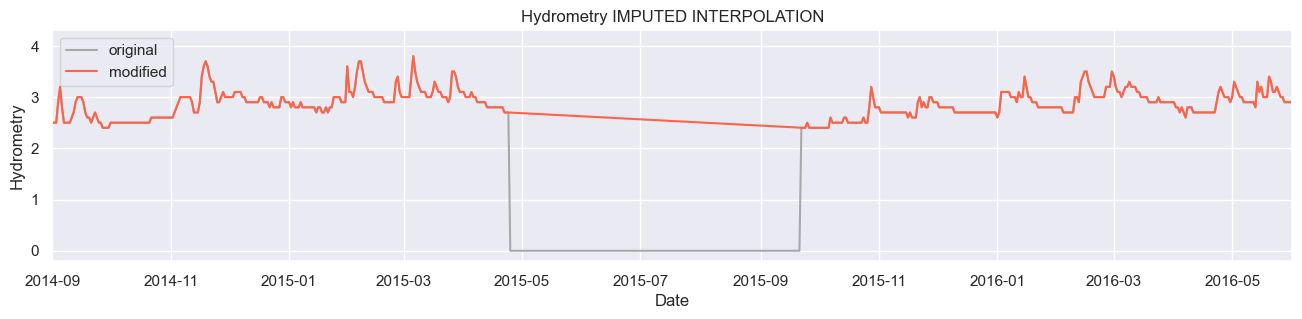

In [10]:
from datetime import date

df_clean2 = df_clean1.copy()
df_clean2.Hydrometry.replace(0, np.nan, inplace=True)

f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.Hydrometry, color='darkgray', label='original').set(
    title='Hydrometry IMPUTED FFILL',
    xlim=[date(2014,9,1), date(2016,6,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.Hydrometry.fillna(method='ffill'), color='tomato', label='modified').set(
    xlim=[date(2014,9,1), date(2016,6,1)])
f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.Hydrometry, color='darkgray', label='original').set(
    title='Hydrometry IMPUTED INTERPOLATION',
    xlim=[date(2014,9,1), date(2016,6,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.Hydrometry.interpolate(method='linear'), color='tomato', label='modified').set(
    xlim=[date(2014,9,1), date(2016,6,1)])

[(18017.0, 18170.0)]

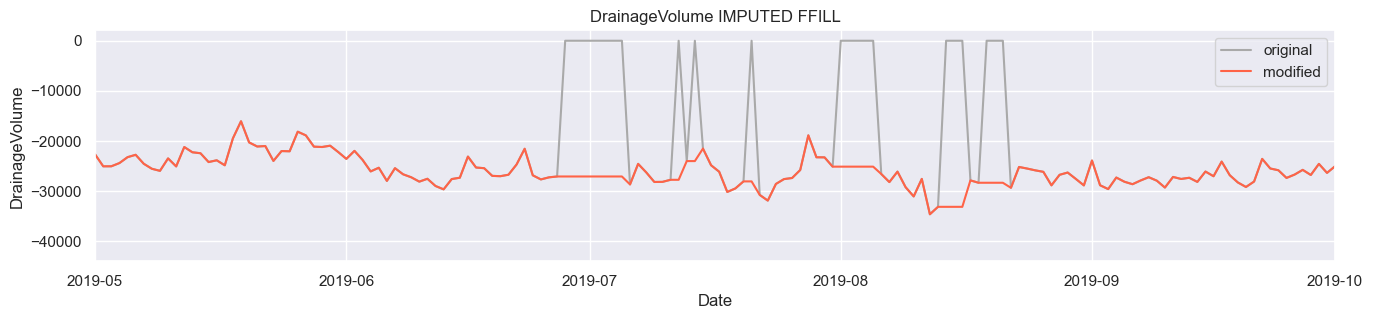

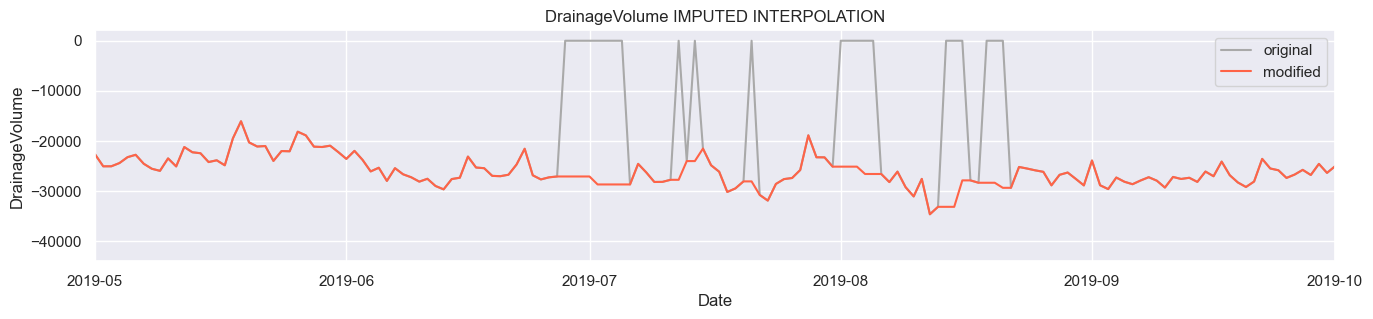

In [11]:
df_clean2.DrainageVolume.replace(0, np.nan, inplace=True)

f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.DrainageVolume, color='darkgray', label='original').set(
    title='DrainageVolume IMPUTED FFILL',
    xlim=[date(2019,5,1), date(2019,10,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.DrainageVolume.fillna(method='ffill'), color='tomato', label='modified').set(
    xlim=[date(2019,5,1), date(2019,10,1)])
f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.DrainageVolume, color='darkgray', label='original').set(
    title='DrainageVolume IMPUTED INTERPOLATION',
    xlim=[date(2019,5,1), date(2019,10,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.DrainageVolume.interpolate(method='nearest'), color='tomato', label='modified').set(
    xlim=[date(2019,5,1), date(2019,10,1)])

As we can see, the best option in this case, seems to best option!

So, lets interpolation missing values

In [12]:
df_clean2.DrainageVolume.interpolate(method='nearest', inplace=True)
df_clean2.Depth.interpolate(method='nearest', inplace=True)
df_clean2.Hydrometry.interpolate(method='linear', inplace=True)

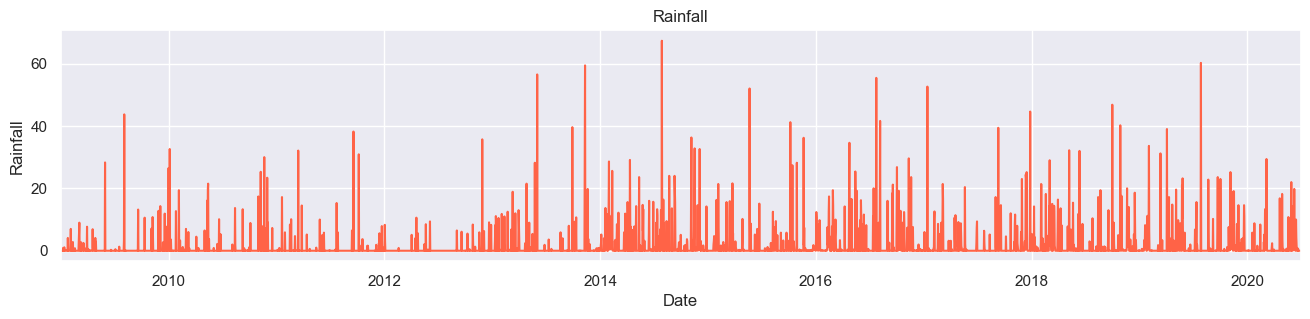

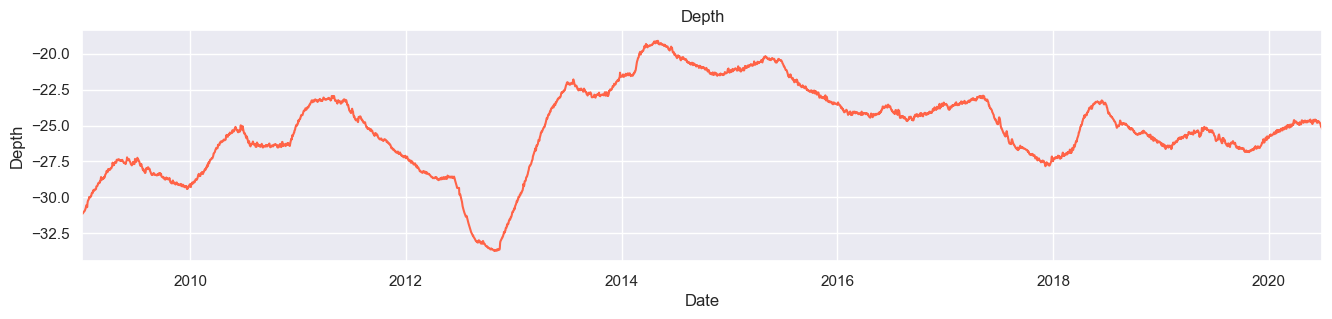

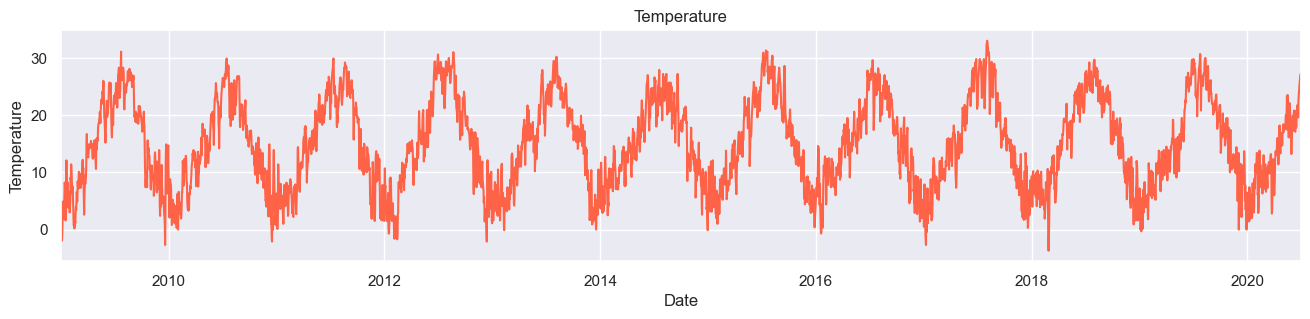

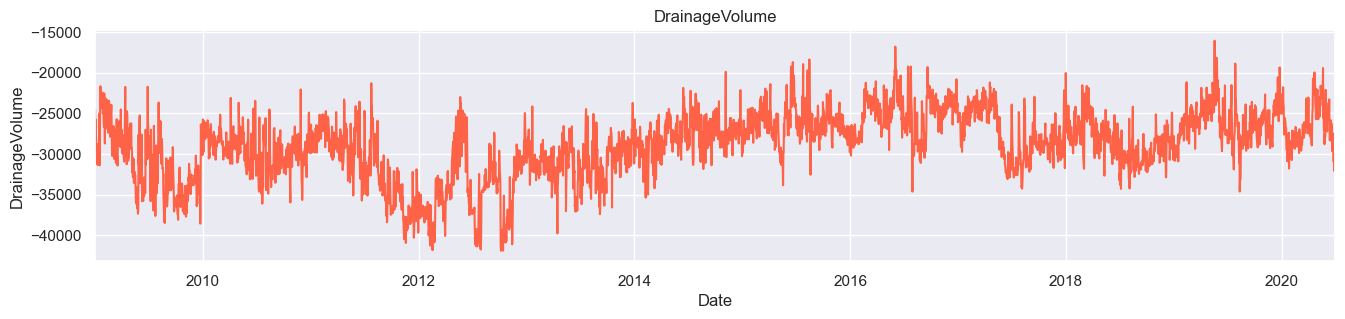

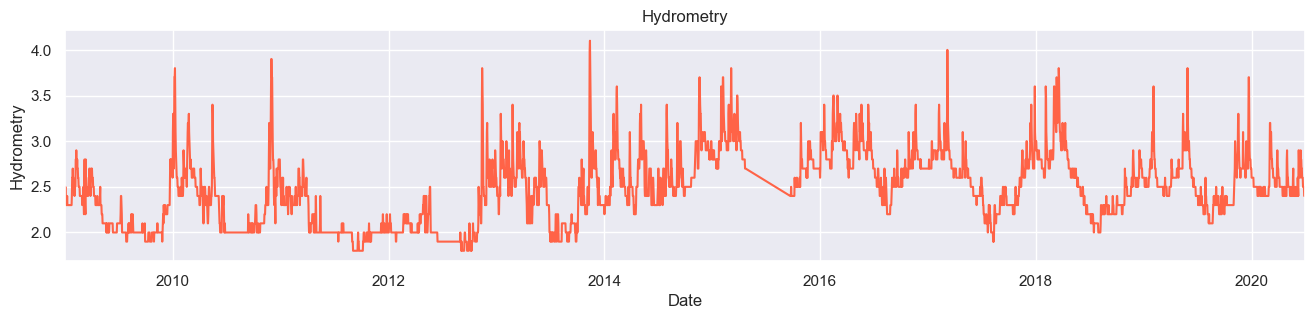

In [13]:
for index, feature in enumerate([i for i in df_clean2.columns if i not in ['Date']]):
    f, ax = plt.subplots(figsize=(16,3))
    sns.lineplot(x=df_clean2.Date, y=df_clean2[feature], color='tomato').set(
        title=feature,
        xlim=[df_clean2.Date.min(), df_clean2.Date.max()])

# **FEATURE ENGINEERING**

## **Resampling Timeseries** 

Resampling can provide additional information on the data. There are two types of resampling:
    
    - Upsampling is when the frequency of samples is increased (e.g. days to hours)
    - Downsampling is when the frequency of samples is decreased (e.g. days to weeks)

In this example, we will do some downsampling with the .resample() function (similar to groupby and aggregate as mean).

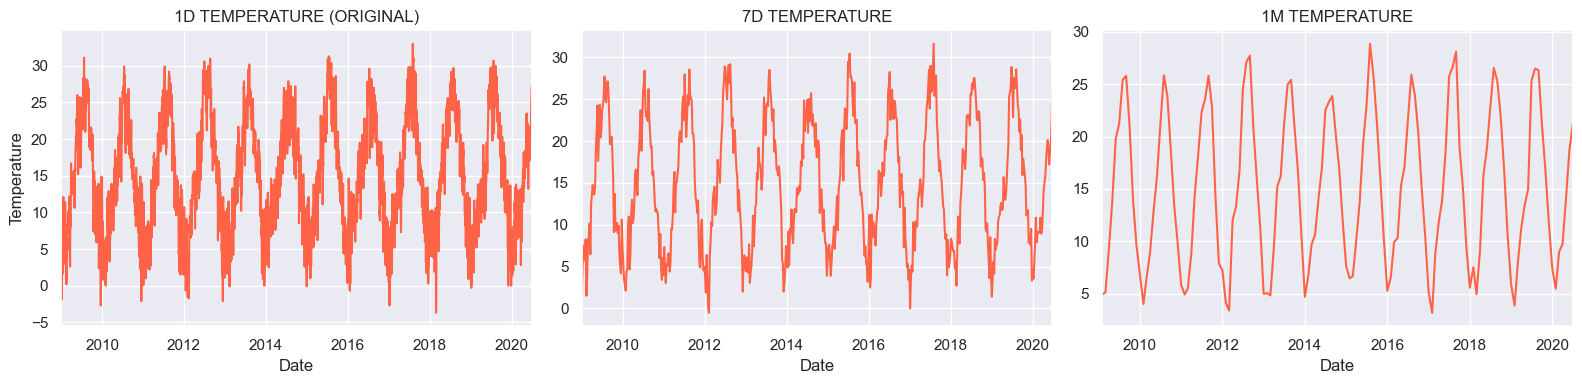

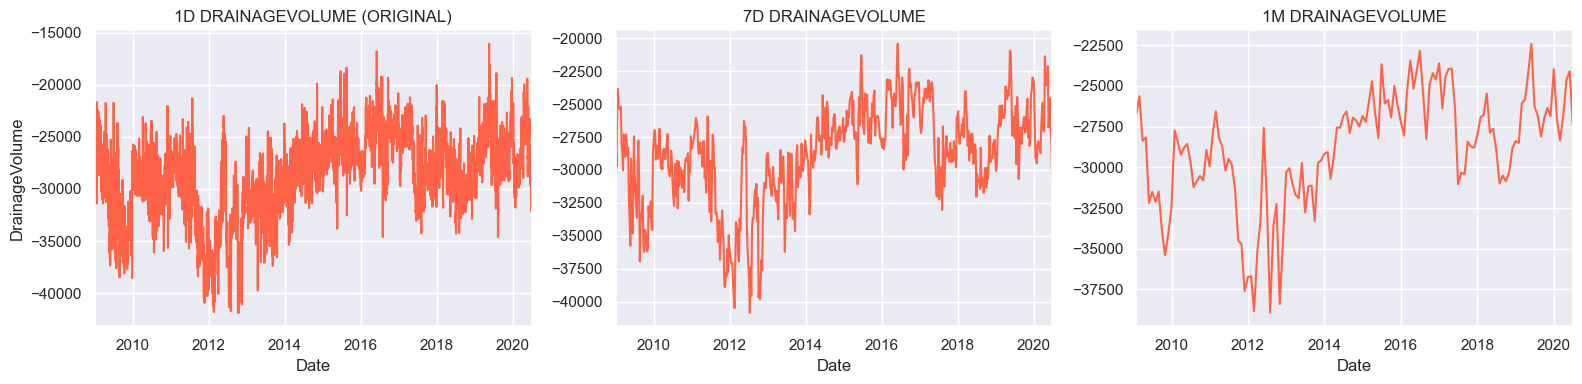

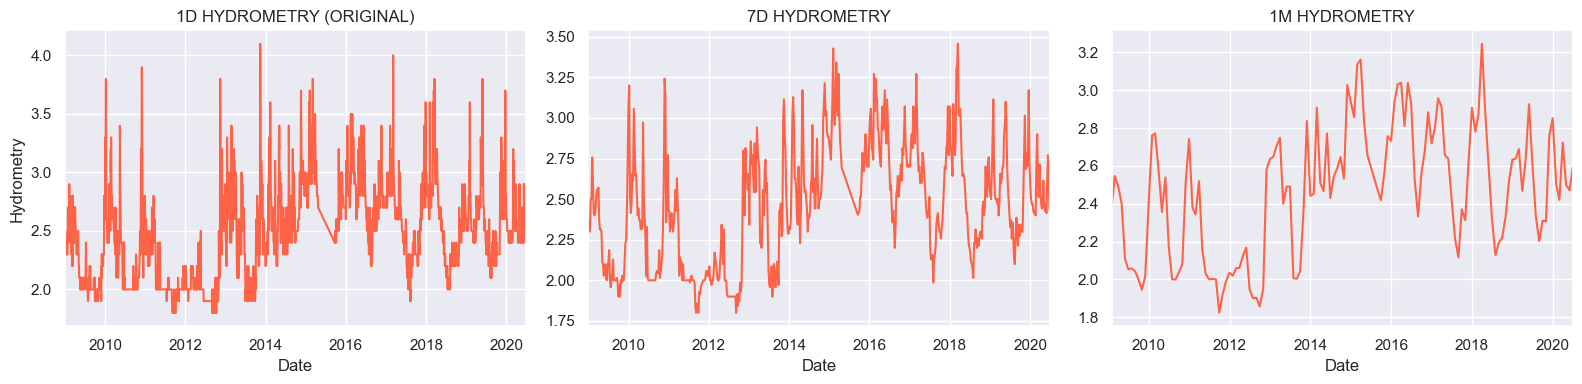

In [59]:
down_7D = df_clean2[df_clean2.columns].resample('7D', on='Date').mean().reset_index()
down_1M = df_clean2[df_clean2.columns].resample('1M', on='Date').mean().reset_index()

f, ax = plt.subplots(1,3, figsize=(16, 4))
sns.lineplot(x=df_clean2.Date, y=df_clean2.Temperature, color='tomato', ax=ax[0]).set(
        title='1D TEMPERATURE (ORIGINAL)',
        xlim=[df_clean2.Date.min(), df_clean2.Date.max()])
sns.lineplot(x=down_7D.Date, y=down_7D.Temperature, color='tomato', ax=ax[1]).set(
        ylabel='',
        title='7D TEMPERATURE',
        xlim=[down_7D.Date.min(), down_7D.Date.max()])
sns.lineplot(x=down_1M.Date, y=down_1M.Temperature, color='tomato', ax=ax[2]).set(
        ylabel='',
        title='1M TEMPERATURE',
        xlim=[down_1M.Date.min(), down_1M.Date.max()])
plt.tight_layout()

f, ax = plt.subplots(1,3, figsize=(16, 4))
sns.lineplot(x=df_clean2.Date, y=df_clean2.DrainageVolume, color='tomato', ax=ax[0]).set(
        title='1D DRAINAGEVOLUME (ORIGINAL)',
        xlim=[df_clean2.Date.min(), df_clean2.Date.max()])
sns.lineplot(x=down_7D.Date, y=down_7D.DrainageVolume, color='tomato', ax=ax[1]).set(
        ylabel='',
        title='7D DRAINAGEVOLUME',
        xlim=[down_7D.Date.min(), down_7D.Date.max()])
sns.lineplot(x=down_1M.Date, y=down_1M.DrainageVolume, color='tomato', ax=ax[2]).set(
        ylabel='',
        title='1M DRAINAGEVOLUME',
        xlim=[down_1M.Date.min(), down_1M.Date.max()])
plt.tight_layout()

f, ax = plt.subplots(1,3, figsize=(16, 4))
sns.lineplot(x=df_clean2.Date, y=df_clean2.Hydrometry, color='tomato', ax=ax[0]).set(
        title='1D HYDROMETRY (ORIGINAL)',
        xlim=[df_clean2.Date.min(), df_clean2.Date.max()])
sns.lineplot(x=down_7D.Date, y=down_7D.Hydrometry, color='tomato', ax=ax[1]).set(
        ylabel='',
        title='7D HYDROMETRY',
        xlim=[down_7D.Date.min(), down_7D.Date.max()])
sns.lineplot(x=down_1M.Date, y=down_1M.Hydrometry, color='tomato', ax=ax[2]).set(
        ylabel='',
        title='1M HYDROMETRY',
        xlim=[down_1M.Date.min(), down_1M.Date.max()])
plt.tight_layout()

As we can see, downsample to weekly could smooth the data. Meanwhile downsample to monthly oversmooth.

In [63]:
df_clean3 = df_clean2.copy()
df_clean3 = df_clean3[df_clean3.columns].resample('7D', on='Date').mean().reset_index()

## **Stationarity**
Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has:

    - constant mean and mean is not time-dependent
    - constant variance and variance is not time-dependent
    - constant covariance and covariance is not time-dependent

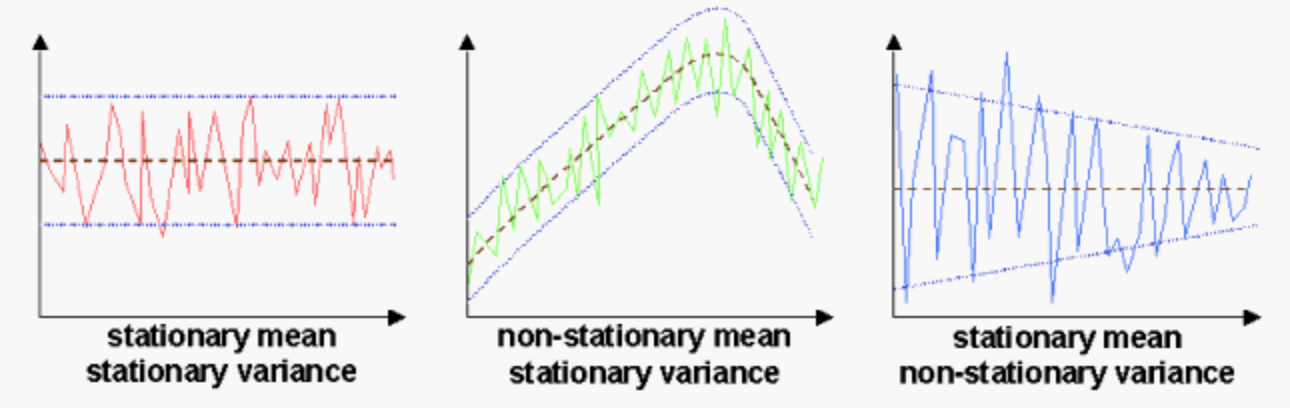

The check for stationarity can be done via three different approaches:

    - visually: plot time series and check for trends or seasonality
    - basic statistics: split time series and compare the mean and variance of each partition
    - statistical test: Augmented Dickey Fuller test


### **With Statistics**

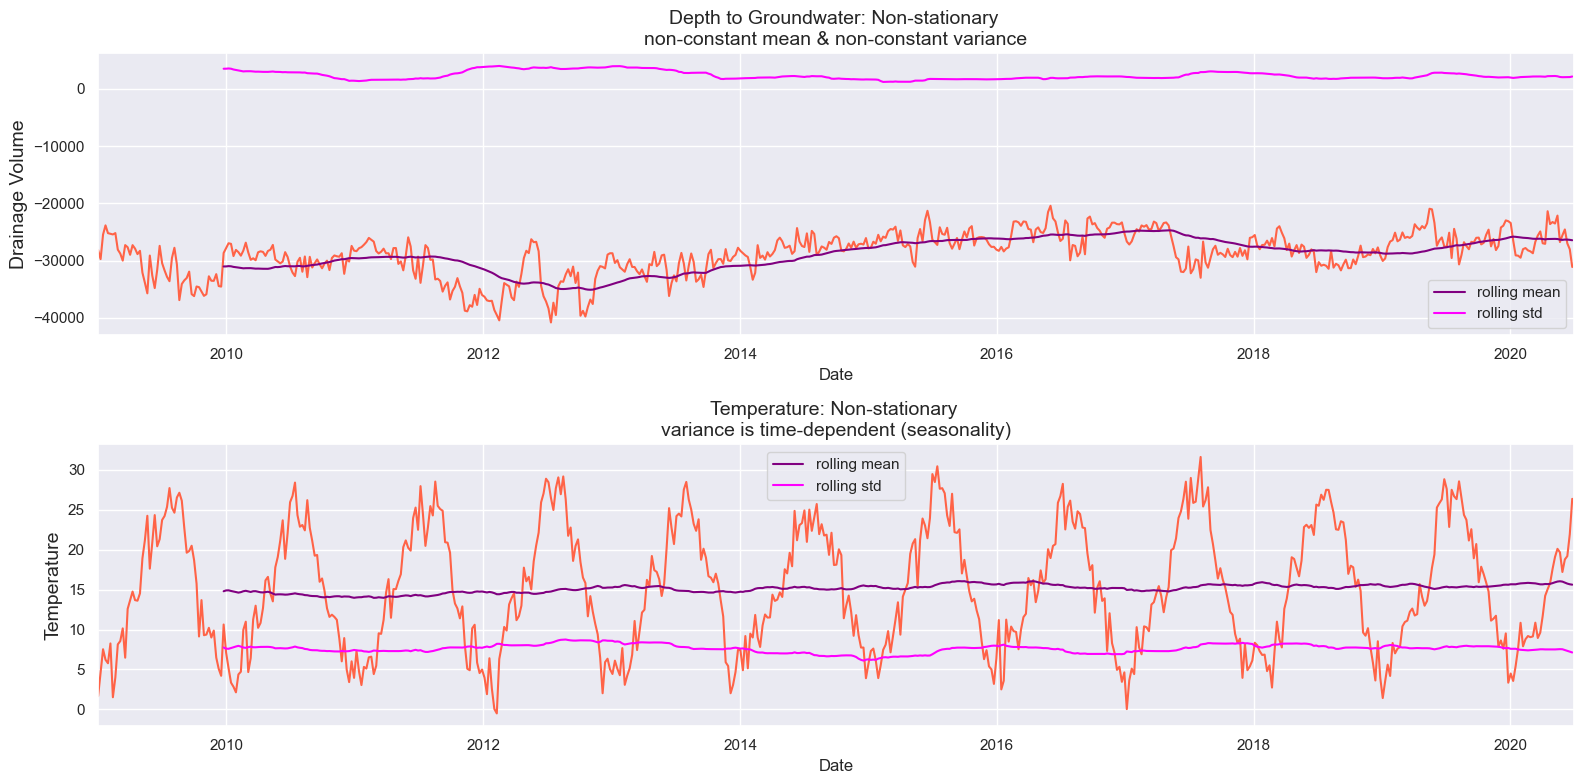

In [81]:
# A year has 52 weeks (52 weeks * 7 days per week) aporx.
rolling_window = 52
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.lineplot(x=df_clean3['Date'], y=df_clean3['DrainageVolume'], ax=ax[0], color='tomato')
sns.lineplot(x=df_clean3['Date'], y=df_clean3['DrainageVolume'].rolling(rolling_window).mean(), ax=ax[0], color='purple', label='rolling mean')
sns.lineplot(x=df_clean3['Date'], y=df_clean3['DrainageVolume'].rolling(rolling_window).std(), ax=ax[0], color='magenta', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

sns.lineplot(x=df_clean3['Date'], y=df_clean3['Temperature'], ax=ax[1], color='tomato')
sns.lineplot(x=df_clean3['Date'], y=df_clean3['Temperature'].rolling(rolling_window).mean(), ax=ax[1], color='purple', label='rolling mean')
sns.lineplot(x=df_clean3['Date'], y=df_clean3['Temperature'].rolling(rolling_window).std(), ax=ax[1], color='magenta', label='rolling std')
ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

plt.tight_layout()
plt.show()

As we can see, the features don't have constant mean and std, but they are close to it.




### **With ADF (Augmented Dickey-Fuller)**

Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

    - Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).
    - Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

If the null hypothesis can be rejected, we can conclude that the time series is stationary. There are two ways to rejects the null hypothesis:

On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

    - p-value > significance level (default: 0.05)**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - p-value <= significance level (default: 0.05)**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

    - ADF statistic > critical value: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - ADF statistic < critical value: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [96]:
from statsmodels.tsa.stattools import adfuller

# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
result = adfuller(df_clean3.Depth) #[adf, pvalue, usedlag, nobs, critical_values, icbest, resstrore]

In [109]:
def adfuller_test(data, feature, alpa=0.05):
    alpha = 0.05
    adf_test = adfuller(data[feature])
    adf_value = adf_test[0]
    pvalue = adf_test[1]
    critical_value_1 = adf_test[4]['1%']
    critical_value_5 = adf_test[4]['5%']
    critical_value_10 = adf_test[4]['10%']

    if (pvalue <= alpha) & (adf_value <= critical_value_1): linecolor = 'seagreen'
    elif (pvalue <= alpha) & (adf_value <= critical_value_5): linecolor = 'mediumseagreen'
    elif (pvalue <= alpha) & (adf_value <= critical_value_10): linecolor = 'limegreen'
    else: linecolor = 'crimson'

    f, ax = plt.subplots(figsize=(16,3))
    sns.lineplot(data=data, x='Date', y=feature, color=linecolor).set(
        title=(f'{feature.upper()}\nADF Statistic {adf_value:0.3f} || p-value: {pvalue:0.3f} || Critical Values 1%: {critical_value_1:0.3f} | 5%: {critical_value_5:0.3f} | 10%: {critical_value_10:0.3f}'),
        xlabel='',
        xlim=[data.Date.min(), data.Date.max()]
    )
    plt.tight_layout()

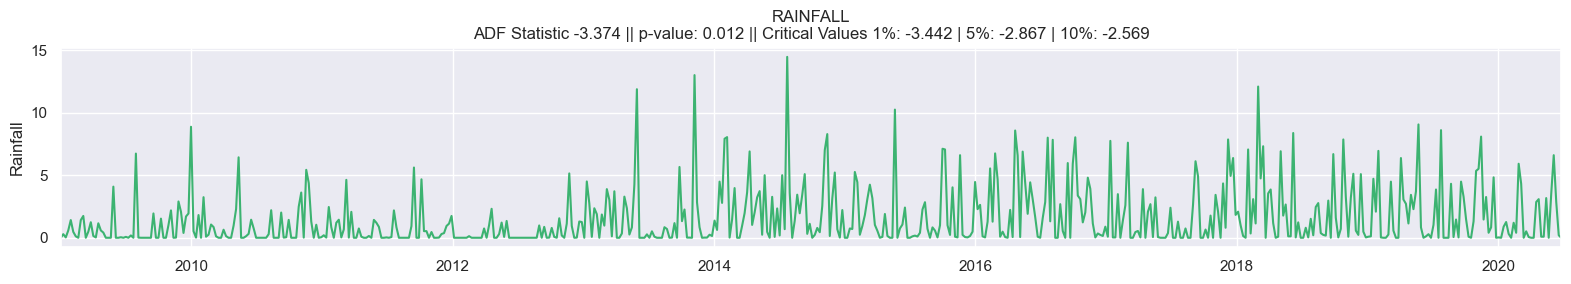

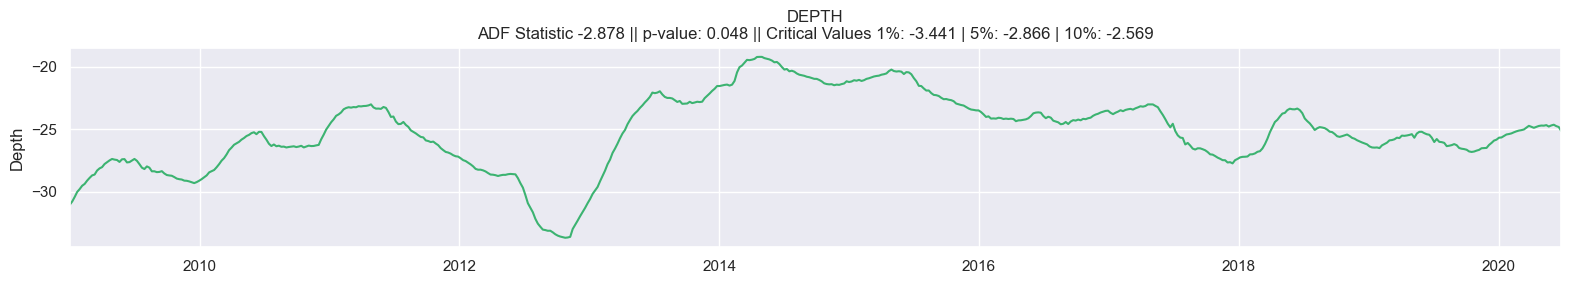

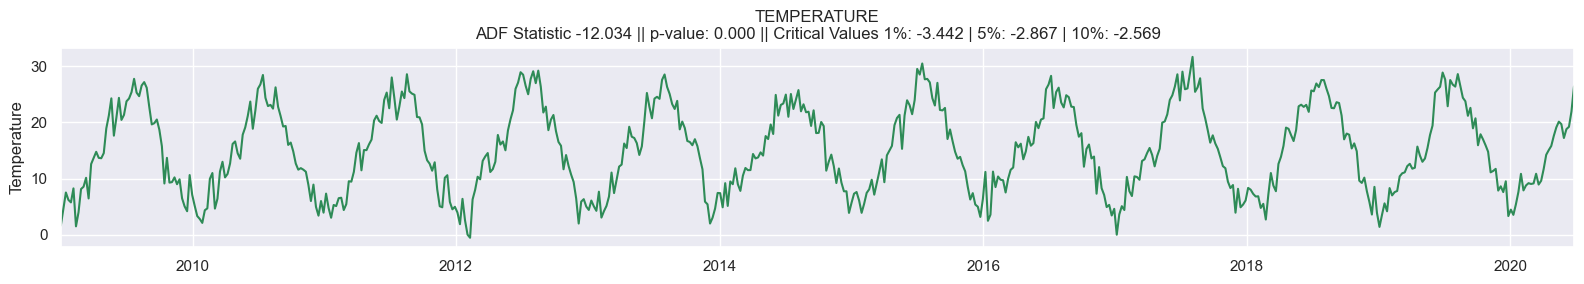

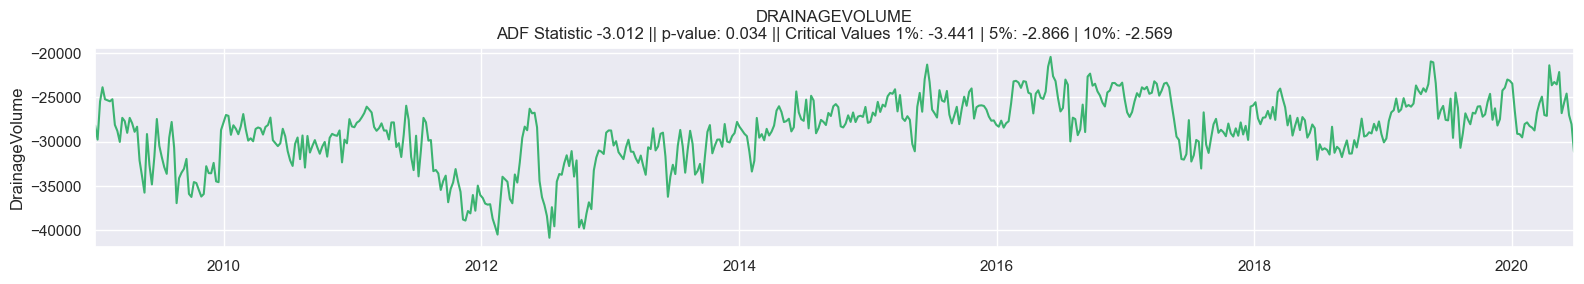

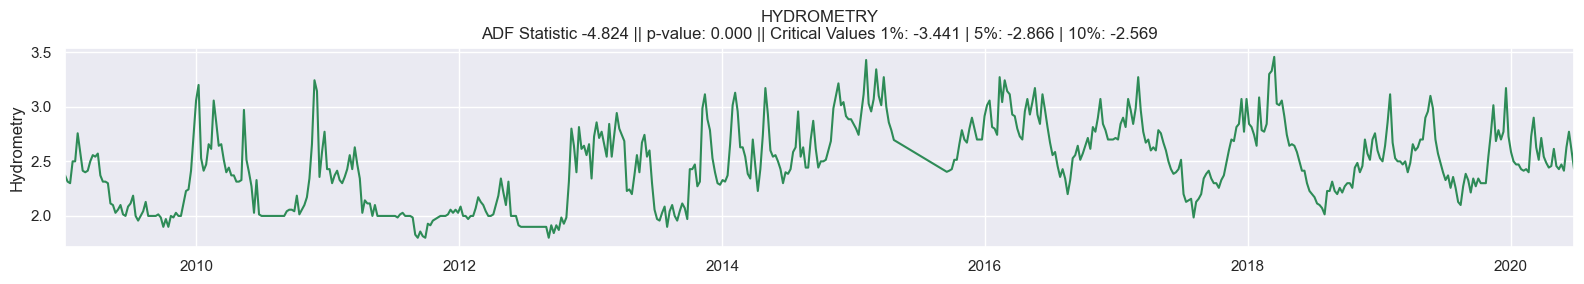

In [110]:
for index, feature in enumerate([i for i in df_clean3.columns if i not in ['Date']]):
    adfuller_test(data=df_clean3, feature=feature)

As we can see, all features reject hypothesis null. It means the data is stationary. If the data is not stationary but we want to use a model such as ARIMA (that requires this characteristic), the data has to be transformed.

The two most common methods to transform TARGET series into stationarity ones are:

    - Transformation: e.g. log or square root to stabilize non-constant variance (Using this method)
    - Differencing: subtracts the current value from the previous

## **Feature Transformation**

In [136]:
def histBoxPlot(feature, figsize=(16,4), bins=None, title=''):
    f,(ax_box,ax_hist)=plt.subplots(nrows=2,sharex=True, gridspec_kw={'height_ratios':(0.1,0.9)},figsize=figsize)                                  
    sns.distplot(feature,kde=True,ax=ax_hist,bins=bins,color='violet',label=f'stdev {np.std(feature):.4f}').set(xlabel='') 
    sns.boxplot(x=feature,ax=ax_box, color='violet').set(xlabel=None)
    ax_hist.axvline(np.mean(feature),color='purple',linestyle=':', label=f'mean {np.mean(feature):.4f}')
    ax_hist.axvline(np.median(feature),color='purple',linestyle='--', label=f'median {np.median(feature):.4f}')
    plt.legend()
    plt.suptitle(title)
    plt.tight_layout()

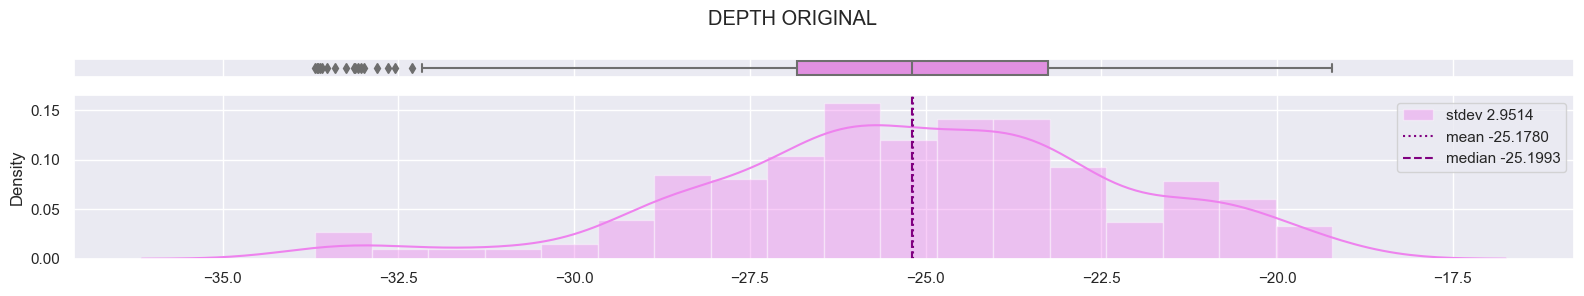

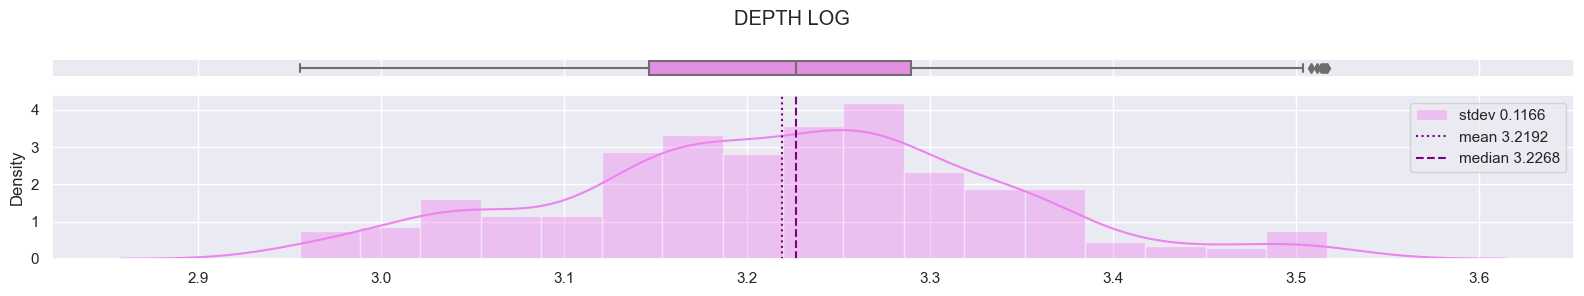

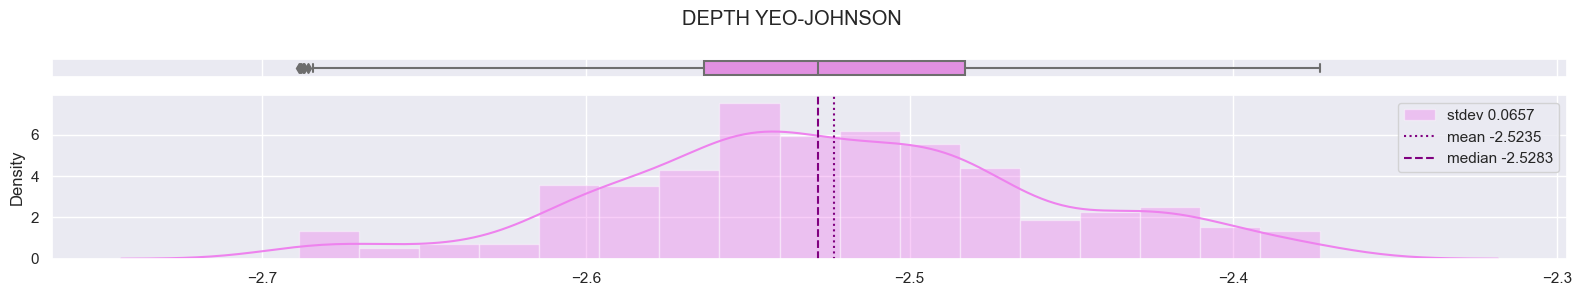

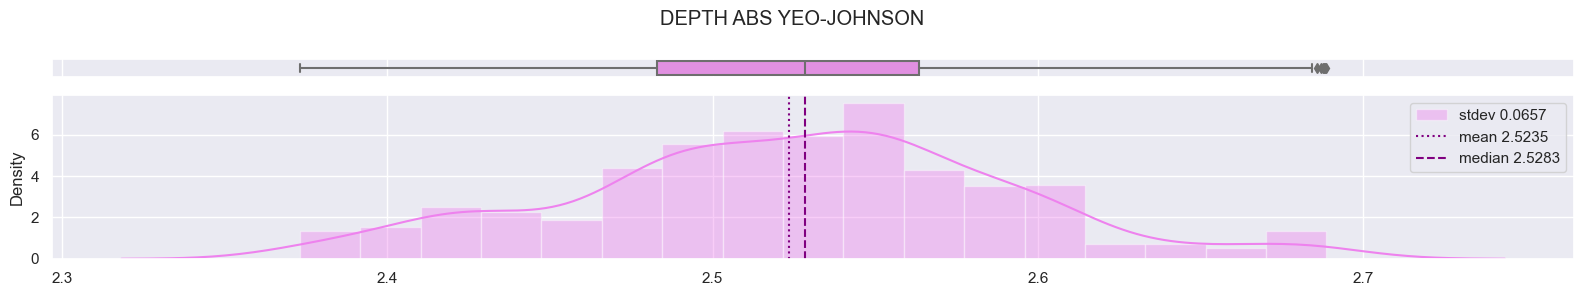

In [138]:
import scipy.stats as stats

df_clean4 = df_clean3.copy()
df_clean4['DepthLog'] = np.log(abs(df_clean4.Depth))            # add abs if negative value
df_clean4['DepthYJ'], _ = stats.yeojohnson(df_clean4.Depth)
df_clean4['DepthAbsYJ'], _ = stats.yeojohnson(np.abs(df_clean4.Depth))
# df_clean4['DepthBoxCox'], _ = stats.boxcox(df_clean4.Depth)   # Can't negative value

histBoxPlot(df_clean4.Depth, title='DEPTH ORIGINAL', figsize=(16,3))
histBoxPlot(df_clean4.DepthLog, title='DEPTH LOG', figsize=(16,3))
histBoxPlot(df_clean4.DepthYJ, title='DEPTH YEO-JOHNSON', figsize=(16,3))
histBoxPlot(df_clean4.DepthAbsYJ, title='DEPTH ABS YEO-JOHNSON', figsize=(16,3))

## **Add Feature**

In [208]:
df_clean5 = df_clean4.copy()

df_clean5['Year'] = df_clean5.Date.dt.year
df_clean5['Month'] = df_clean5.Date.dt.month
df_clean5['Day'] = df_clean5.Date.dt.day
df_clean5['DayOfYear'] = df_clean5.Date.dt.dayofyear
df_clean5['WeekOfYear'] = df_clean5.Date.dt.weekofyear
df_clean5['Quarter'] = df_clean5.Date.dt.quarter
# df_clean5['Year'] = pd.DatetimeIndex(df_clean5.Date).year
# df_clean5['Month'] = pd.DatetimeIndex(df_clean5.Date).month
# df_clean5['Day'] = pd.DatetimeIndex(df_clean5.Date).day
# df_clean5['DayOfYear'] = pd.DatetimeIndex(df_clean5.Date).dayofyear
# df_clean5['WeekOfYear'] = pd.DatetimeIndex(df_clean5.Date).weekofyear
# df_clean5['Quarter'] = pd.DatetimeIndex(df_clean5.Date).quarter
df_clean5['Season'] = df_clean5.Month % 12 // 3 + 1 ## -> // == math.floor

data_profile(df_clean5)
df_clean5

Dimensions	: (600, 16)
Data Size	: 0.08 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Date,datetime64[ns],0,0.0,600,"[2009-01-01T00:00:00.000000000, 2009-01-08T00:..."
Rainfall,float64,0,0.0,251,"[0.0, 0.2857142857142857, 0.028571428571428574..."
Depth,float64,0,0.0,575,"[-31.048571428571428, -30.784285714285716, -30..."
Temperature,float64,0,0.0,524,"[1.6571428571428573, 4.571428571428571, 7.5285..."
DrainageVolume,float64,0,0.0,599,"[-28164.918857142857, -29755.789714285715, -25..."
Hydrometry,float64,0,0.0,137,"[2.371428571428571, 2.314285714285714, 2.3, 2...."
DepthLog,float64,0,0.0,573,"[3.4355527985793923, 3.4270043556995065, 3.415..."
DepthYJ,float64,0,0.0,572,"[-2.6442556328099345, -2.6395641125287908, -2...."
DepthAbsYJ,float64,0,0.0,572,"[2.644256505254809, 2.63956498155958, 2.633023..."
Year,int64,0,0.0,12,"[2009, 2010, 2011, 2012, 2013, 2014, 2015, 201..."


,Date,Rainfall,Depth,Temperature,DrainageVolume,Hydrometry,DepthLog,DepthYJ,DepthAbsYJ,Year,Month,Day,DayOfYear,WeekOfYear,Quarter,Season
0,2009-01-01,0.000000,-31.048571,1.657143,-28164.918857,2.371429,3.435553,-2.644256,2.644257,2009,1,1,1,1,1,1
1,2009-01-08,0.285714,-30.784286,4.571429,-29755.789714,2.314286,3.427004,-2.639564,2.639565,2009,1,8,8,2,1,1
2,2009-01-15,0.028571,-30.420000,7.528571,-25463.190857,2.300000,3.415100,-2.633022,2.633023,2009,1,15,15,3,1,1
3,2009-01-22,0.585714,-30.018571,6.214286,-23854.422857,2.500000,3.401816,-2.625711,2.625712,2009,1,22,22,4,1,1
4,2009-01-29,1.414286,-29.790000,5.771429,-25210.532571,2.500000,3.394173,-2.621498,2.621499,2009,1,29,29,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2020-05-28,3.514286,-24.697143,17.214286,-25591.062857,2.414286,3.206688,-2.516908,2.516909,2020,5,28,149,22,2,2
596,2020-06-04,6.600000,-24.638571,18.785714,-24567.099429,2.628571,3.204313,-2.515568,2.515569,2020,6,4,156,23,2,3
597,2020-06-11,2.857143,-24.751429,19.200000,-26998.518857,2.771429,3.208883,-2.518147,2.518147,2020,6,11,163,24,2,3
598,2020-06-18,0.200000,-24.822857,21.942857,-28030.134857,2.600000,3.211765,-2.519772,2.519773,2020,6,18,170,25,2,3


### **Fix Cyclical Features**
The new time features are cyclical. For example,the feature month cycles between 1 and 12 for every year. While the difference between each month increments by 1 during the year, between two years the month feature jumps from 12 (December) to 1 (January). This results in a -11 difference, which can confuse a lot of models.

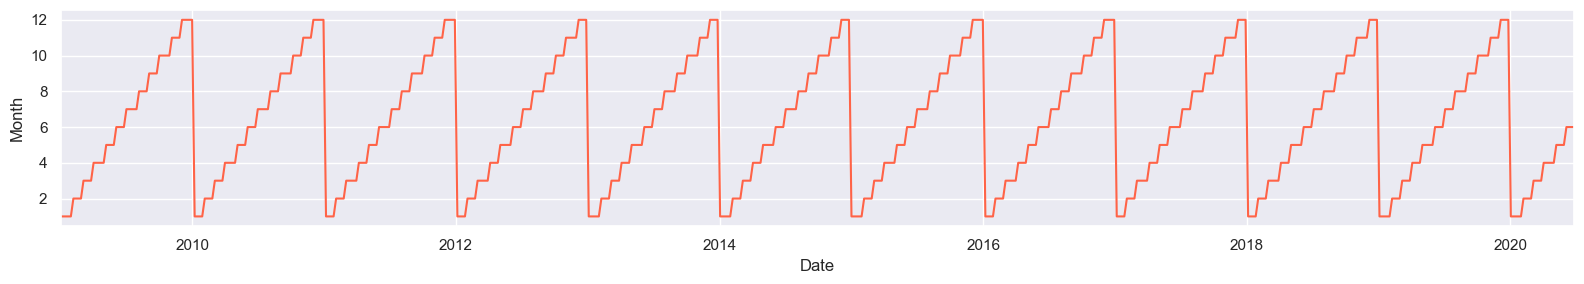

In [212]:
f, ax = plt.subplots(figsize=(16,3))

sns.lineplot(x=df_clean5.Date, y=df_clean5.Month, color='tomato').set(
    xlim=[df_clean5.Date.min(), df_clean5.Date.max()]
)
plt.tight_layout()

As we can see, it is misleading. Let's encode this cyclical feature:

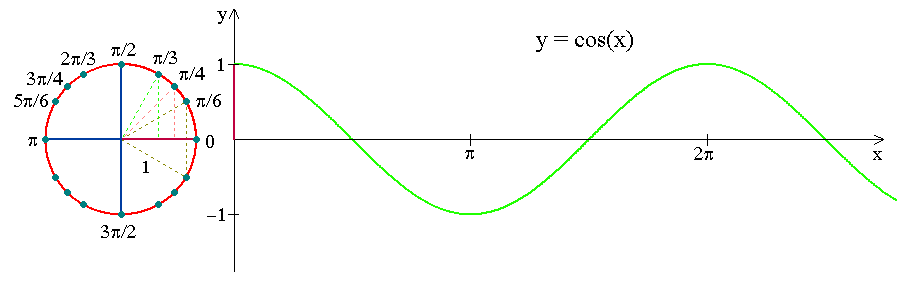

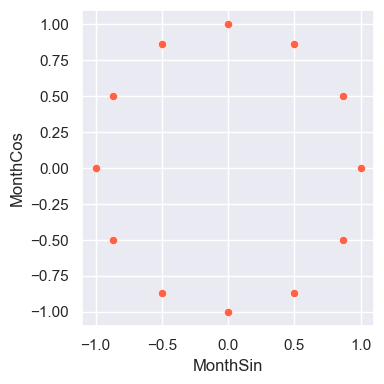

In [254]:
df_clean6 = df_clean5.copy()
num_of_month = 12

df_clean6['MonthSin'] = np.sin(2*np.pi*df_clean6.Month/num_of_month)
df_clean6['MonthCos'] = np.cos(2*np.pi*df_clean6.Month/num_of_month)

f, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x=df_clean6.MonthSin, y=df_clean6.MonthCos, color='tomato')
plt.tight_layout()

## **Time Series Decomposition**